In [5]:
# Title: DMRG for Bachelor Thesis
# Author: Aaron Sander
# Date: March-April 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of Matrix Product States (MPS) and Density Matrix
# Renormalization Group (DMRG) for compressing an arbitrary quantum state
# which has relevant applications in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [6]:
######################### IMPORTS #############################################
from canonical_forms import *
from compression import *
from contractions import *
import initializations as init
from metrics import *
import machine_learning as ML
import activation_functions as act

import ground_state_search as gnd

import numpy as np

In [7]:
MPO = init.initialize_quantum_ising_MPO(num_sites=50, J=1, g=1)

In [8]:
E, V, max_bond_dim = gnd.ground_state_search(MPO, threshold=1e-6)

-238.45332243042662
Energy: -249.3203502878827 , Bond Dim: 1
Energy: -249.40148338106715 , Bond Dim: 1
Energy: -249.40247060623562 , Bond Dim: 1
Energy: -253.96021576474945 , Bond Dim: 2
Energy: -254.10680135877237 , Bond Dim: 2
Energy: -254.10990245078233 , Bond Dim: 2
Energy: -254.11002186424582 , Bond Dim: 2
Energy: -254.16719241720259 , Bond Dim: 3
Energy: -254.221977595411 , Bond Dim: 3
Energy: -254.22698376406666 , Bond Dim: 3
Energy: -254.22710489327673 , Bond Dim: 3
Energy: -254.26271477640955 , Bond Dim: 4
Energy: -254.2669286575157 , Bond Dim: 4
Energy: -254.26733619749416 , Bond Dim: 4
Energy: -254.27100103827735 , Bond Dim: 5
Energy: -254.2741853341463 , Bond Dim: 5
Energy: -254.27562481663662 , Bond Dim: 5
Energy: -254.2758216439537 , Bond Dim: 5
Energy: -254.2792425624614 , Bond Dim: 6
Energy: -254.2812472738763 , Bond Dim: 6
Energy: -254.2818911542254 , Bond Dim: 6
Energy: -254.28314510949934 , Bond Dim: 7
Energy: -254.28325695751906 , Bond Dim: 7
Energy: -254.2839394337

811104 4
-247.88677093976938 4
-247.88683149643433 4
-247.8868911184805 4
-247.88694988015428 4
-247.88700784997607 4
-247.88706509113248 4
-247.88712166186178 4
-247.88717761580995 4
-247.8872330023752 4
-247.88728786703103 4
-247.88734225162054 4
-247.88739619464525 4
-247.88744973152336 4
-247.8875028948321 4
-247.8875557145367 4
-247.88760821819073 4
-247.88766043113742 4
-247.88771237668027 4
-247.8877640762531 4
-247.88781554956242 4
-247.88786681473755 4
-247.88791788844688 4
-247.88796878602312 4
-247.88801952156263 4
-247.88807010804382 4
-247.88812055739285 4
-247.88817088058616 4
-247.88822108772098 4
-247.88827118808703 4
-247.88832119023076 4
-247.88837110202144 4
-247.88842093069317 4
-247.8884706829126 4
-247.88852036480932 4
-247.888569982033 4
-247.88861953978235 4
-247.8886690428434 4
-247.88871849563128 4
-247.88876790220712 4
-247.88881726632425 4
-247.88886659143324 4
-247.888915880725 4
-247.88896513714454 4
-247.88901436341087 4
-247.889063562037 4
-247.889112735

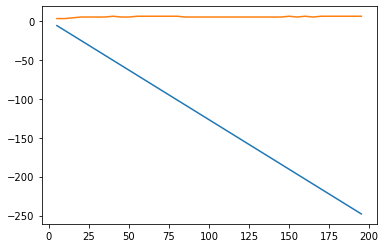

In [4]:
energies = []
bond_dims = []
for sites in range(5, 200, 5):
    MPO = init.initialize_quantum_ising_MPS(num_sites=sites, J=1, g=-1)
    E, V, max_dim = gnd.ground_state_search(MPO, threshold=1e-2)
    energies.append(E)
    bond_dims.append(max_dim)
plt.plot(range(5, 200, 5), energies)
plt.plot(range(5, 200, 5), bond_dims)

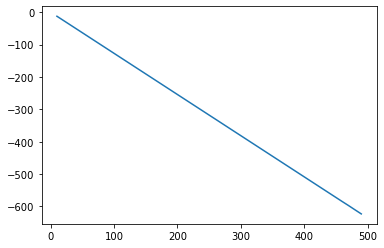

In [7]:
plt.plot(range(10, 500, 10), energies)

# Compression

The following generates a list of possible Matrix Product States with maximum bond dimensions up to that of the raw data.

In [3]:
data = init.initialize_random_normed_vector(length=1024)

In [4]:
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

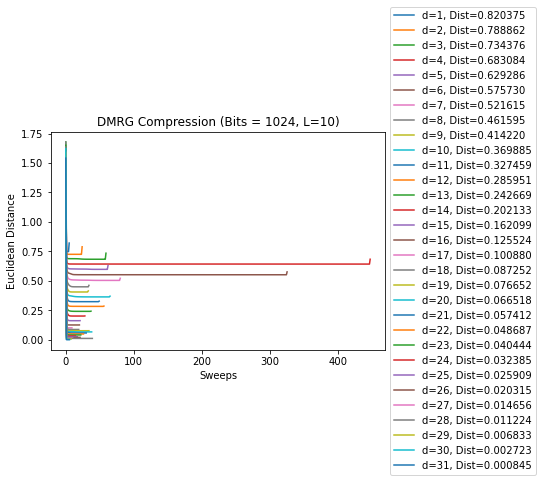

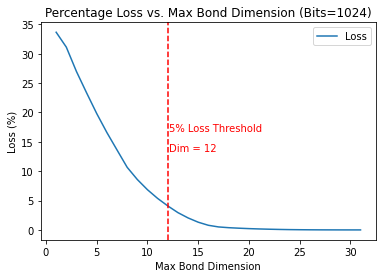

In [5]:
compressions, sim, loss = benchmark_compression(raw_state, threshold=1e-8)

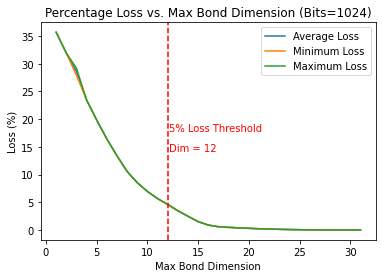

In [17]:
benchmark_compression_loss(raw_state, attempts=3)

In [3]:
import numpy as np
import scipy
import scipy.sparse.linalg
import scipy.sparse as sparse

In [21]:
identity = np.identity(2)
Z = np.array([[1, 0],
              [0, -1]])

X = np.array([[0, 1],
              [1, 0]])
J = -1
g = -1

In [22]:
test = np.kron(identity, identity)

In [23]:
H = -g*np.kron(np.kron(identity, identity), X) - J*np.kron(np.kron(identity, Z), Z) - g*np.kron(np.kron(identity, X), identity) - J*np.kron(np.kron(Z, Z), identity) - g*np.kron(np.kron(X, identity), identity) 

In [24]:
H

array([[ 2.,  1.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  0., -2.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1., -2.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  1.,  2.]])

In [25]:
E, V = sparse.linalg.eigsh(H, k=100, which='SA', tol=1E-8)

In [9]:
E = np.reshape(E, (2, 2, 2))

In [10]:
E.shape

(2, 2, 2)

In [11]:
new_tensor = np.zeros((E.shape[0], E.shape[1], E.shape[2]+1))
new_tensor[:E.shape[0], :E.shape[1], :E.shape[2]] = E